In [1]:
#load libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.feature_selection import  chi2

In [2]:
#load the data
cars = pd.read_csv('C:/python/cars_price.csv')

### Exploratory Data Analysis

In [3]:
#look at the data
cars.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
#shape of the data
cars.shape

(40000, 13)

In [5]:
#columns
cars.columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')

In [6]:
#univariate analysis
cars.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


In [7]:
#datatypes
cars.dtypes

Unnamed: 0               int64
make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

## Multi-Variate Analysis
### Pair-Plot

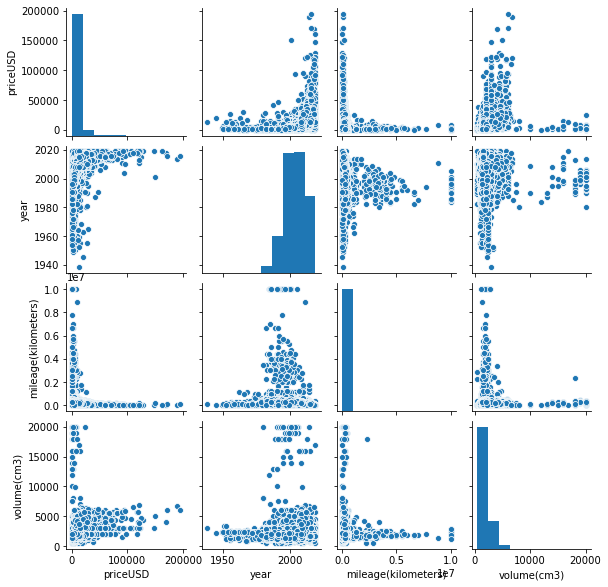

In [208]:
sns.pairplot(cars.drop(['Unnamed: 0'],axis = 1),size = 2)

###### We can not see strong linear relationship between variables , but :
~ For lower mileage, the priceUSD is high as compared to low mileage cars

~ For higher Volume also priceUSD is comparitively high than low Volume cars

~ price of cars suddenly increased after year 2000

## Data Pre-Processing
### Missing Value Analysis

In [8]:
cars.isnull().sum()

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

### Imputing missing values

In [9]:
cars['drive_unit'] = cars['drive_unit'].fillna(cars['drive_unit'].mode()[0])
cars['segment'] = cars['segment'].fillna(cars['segment'].mode()[0])
cars['volume(cm3)'] = cars['volume(cm3)'].fillna(cars['volume(cm3)'].median())

In [10]:
#checking missing values
cars.isnull().sum()

Unnamed: 0             0
make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
dtype: int64

No mising value found, imputed all

# Data Visualization

# Group By
### Barplot to see the priceUSD in  each category for qualitative features



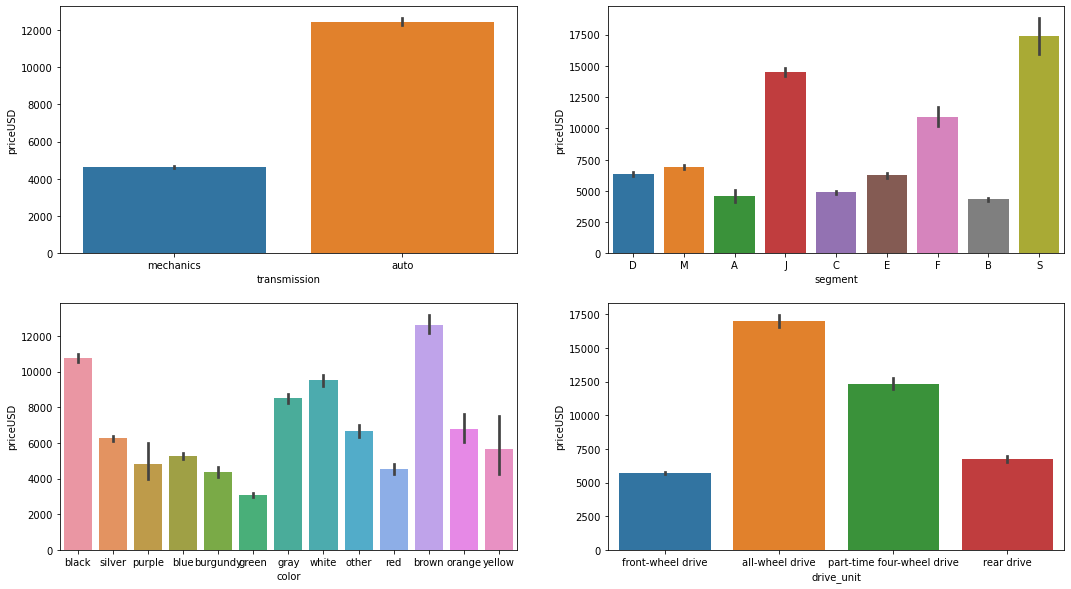

In [11]:
plt.figure(figsize=(18, 10))

plt.subplot(2,2,1)
sns.barplot(cars.transmission, cars.priceUSD)

plt.subplot(2,2,2)
sns.barplot(cars.segment, cars.priceUSD)

plt.subplot(2,2,3)
sns.barplot(cars.color, cars.priceUSD)

plt.subplot(2,2,4)
sns.barplot(cars.drive_unit, cars.priceUSD)

As we can see, all the features have good variance

~ black and brown colored car have high price

~ for auto transmission, price is high and other features as shown above

# Feature Engineering

In [12]:
#merging two features [make & model] and setting as index
cars['car_name'] = cars['make'].str.cat(cars['model'], sep =" ") 
cars.drop(['make','model','Unnamed: 0'] , axis = 1,inplace = True)
cars = cars.set_index('car_name')

In [13]:
#creating new year diff feature
cars['current_year'] = 2020
cars['year_diff_frm_currnt_year'] = cars.current_year - cars.year
cars.drop(['current_year','year'],axis = 1 ,inplace =True)

In [14]:
cars.head()

,priceUSD,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,year_diff_frm_currnt_year
car_name,,,,,,,,,,
honda accord,565,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,27
ford fusion,5550,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,12
nissan teana,8300,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,12
volkswagen fox,3300,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,15
nissan primera,2450,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,18


# Outliers Analysis
### Boxplot

In [15]:
def plot_feature_boxplot(df, features):
    i = 0
    fig, ax = plt.subplots(1,3,figsize=(20,5))
        
    for feature in features:
        i += 1
        plt.subplot(1,3,i)
        sns.boxplot(df[feature]) 
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

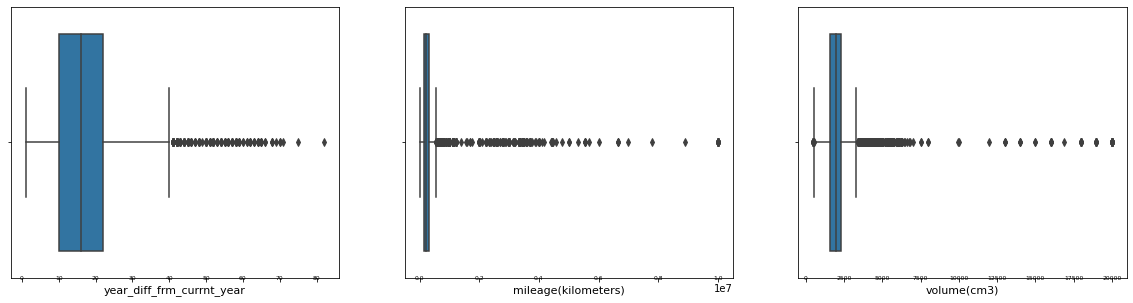

In [16]:
features = cars[['year_diff_frm_currnt_year','mileage(kilometers)', 'volume(cm3)']]
plot_feature_boxplot(cars,features)

 * there are some extreme outliers, which may affect on final output.

### Distribution plot

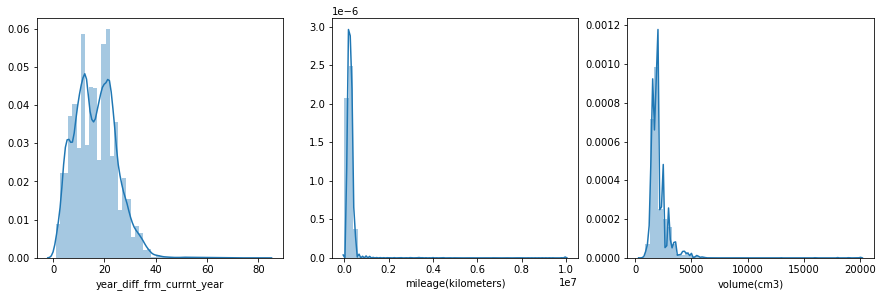

In [17]:
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
sns.distplot(cars.year_diff_frm_currnt_year)

plt.subplot(3,3,2)
sns.distplot(cars['mileage(kilometers)'])

plt.subplot(3,3,3)
sns.distplot(cars['volume(cm3)'])

In [18]:
### assuming year_diff_frm_currnt_year follows gausian distribution

uppper_boundary=cars['year_diff_frm_currnt_year'].mean() + 3* cars['year_diff_frm_currnt_year'].std()
lower_boundary=cars['year_diff_frm_currnt_year'].mean() - 3* cars['year_diff_frm_currnt_year'].std()
print(lower_boundary)
print(uppper_boundary)
print(cars['year_diff_frm_currnt_year'].mean())

-7.830313472658194
40.85906347265819
16.514375


In [19]:
#for volume(cm3) feature (skewed )

IQR = cars['volume(cm3)'].quantile(0.75)-cars['volume(cm3)'].quantile(0.25)


#### Extreme outliers
lower_bridge=cars['volume(cm3)'].quantile(0.25)-(IQR*3)
upper_bridge=cars['volume(cm3)'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-500.0
4400.0


In [20]:
#for mileage(kilometers) [skewed]
IQR=cars['mileage(kilometers)'].quantile(0.75)-cars['mileage(kilometers)'].quantile(0.25)


#### Extreme outliers
lower_bridge=cars['mileage(kilometers)'].quantile(0.25)-(IQR*3)
upper_bridge=cars['mileage(kilometers)'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-378283.0
824044.0


In [21]:
data=cars.copy()

* removing outliers will end up with loosing most of the data.
* let's impute it by following

In [22]:
#treating outliers
data.loc[data['year_diff_frm_currnt_year']>  40,'year_diff_frm_currnt_year']= 40
data.loc[data['volume(cm3)']> 4400,'volume(cm3)']= 4400
data.loc[data['mileage(kilometers)']> 824044,'mileage(kilometers)']= 824044

In [23]:
data.head()

,priceUSD,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,year_diff_frm_currnt_year
car_name,,,,,,,,,,
honda accord,565,with mileage,824044.0,petrol,2000.0,black,mechanics,front-wheel drive,D,27
ford fusion,5550,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,12
nissan teana,8300,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,12
volkswagen fox,3300,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,15
nissan primera,2450,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,18


# chi-square test

In [24]:
color_fuel_type_crosstab = pd.crosstab(data['color'], data['fuel_type'], 
                                      margins=True)
color_fuel_type_crosstab.head()

fuel_type,diesel,electrocar,petrol,All
color,,,,
black,3349,4,5514,8867
blue,2055,6,3644,5705
brown,310,0,637,947
burgundy,310,2,1146,1458
gray,1621,3,2537,4161


In [25]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return expected

In [26]:
exp_table_1 = check_categorical_dependency(color_fuel_type_crosstab, 0.95)


Chi-Square Statistic value = 641.2340839838203
P - Value = 5.0280899611931377e-110
Dependent (reject H0)


* color and fuel_type features are dependent as p-value is less than 0.05
### dropping fuel_type feature

In [27]:
data = data.drop(['fuel_type'],axis = 1)

### Label-Encoding for converting categories into numbers associated with each categories

In [28]:
le = LabelEncoder()
data = data.apply(le.fit_transform)

In [29]:
data.head()

,priceUSD,condition,mileage(kilometers),volume(cm3),color,transmission,drive_unit,segment,year_diff_frm_currnt_year
car_name,,,,,,,,,
honda accord,147,2,6281,206,0,1,1,3,26
ford fusion,915,2,2611,80,10,1,1,7,11
nissan teana,1174,2,3379,277,8,0,1,3,11
volkswagen fox,662,2,2165,29,1,1,1,0,14
nissan primera,544,1,5764,231,3,1,1,3,17


# Feature Selection
### Heatmap - Correlation Analysis
* If corrleation value is [0.7+ or -0.7+] , that two features have high corrleation. It ranges between 1 to -1 

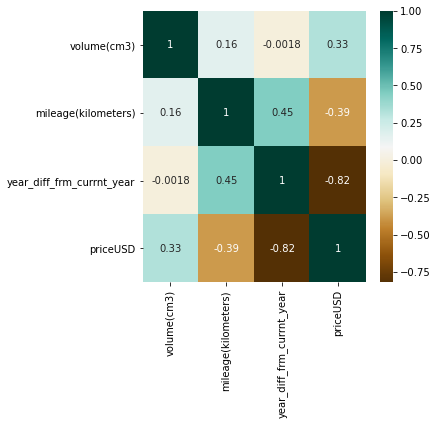

In [30]:
plt.figure(figsize = (5,5))        # Size of the figure
sns.heatmap(data[['volume(cm3)','mileage(kilometers)','year_diff_frm_currnt_year','priceUSD']].corr(),annot = True ,cmap="BrBG")
plt.show()

* [year_diff_frm_currnt_year] highly correlated with priceUSD target feature 

* no multi-colinearity problem as no strong linear relationship between predictor features

### Train-Test Split

In [31]:
X = data.drop('priceUSD',axis = 1)
y = data.priceUSD

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=21)

In [33]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((32000, 8), (8000, 8), (32000,), (8000,))

## Feature Scaling

* To convert continuous features in same scale so, interpretation power will increase

In [34]:
#normalization
scaler = MinMaxScaler()

X_train[['year_diff_frm_currnt_year', 'mileage(kilometers)', 'volume(cm3)']] = scaler.fit_transform(X_train[['year_diff_frm_currnt_year', 'mileage(kilometers)', 'volume(cm3)']])

X_train.head()

,condition,mileage(kilometers),volume(cm3),color,transmission,drive_unit,segment,year_diff_frm_currnt_year
car_name,,,,,,,,
peugeot 308,2,0.421430,0.354167,4,1,1,2,0.153846
mazda cx-7,2,0.424455,0.714286,4,0,0,6,0.282051
ford escort,2,0.836809,0.238095,1,1,1,2,0.717949
mitsubishi carisma,2,0.672664,0.470238,10,1,1,7,0.487179
renault laguna,2,0.491482,0.291667,0,1,1,3,0.128205


In [35]:
X_test[['year_diff_frm_currnt_year', 'mileage(kilometers)', 'volume(cm3)']] = scaler.transform(X_test[['year_diff_frm_currnt_year', 'mileage(kilometers)', 'volume(cm3)']])


## Model Development

### Random Forest

In [36]:
#model creation
rf = RandomForestRegressor(max_features = 'sqrt').fit(X_train, y_train)

In [37]:
#prediction on test data
pred  = rf.predict(X_test)

In [38]:
pred[0:5]

array([ 923.21      , 1444.48      ,  467.6       ,  772.63      ,
        900.14333333])

##### Model Validation

In [39]:
#accuracy
print('Accuracy =', r2_score(y_test,pred)*100)

Accuracy = 89.30021706341779


In [40]:
print('MSE =',mean_squared_error(y_test, pred))

MSE = 30186.246655271858


In [41]:
print('RMSE =',np.sqrt(mean_squared_error(y_test, pred)))

RMSE = 173.74189666074173


##### Model- Performance on training (Evaluation)

In [42]:
#prediction on train data
pred_train = rf.predict(X_train)

In [43]:
#accuracy train data
print('Accuracy on Train data =',r2_score(y_train,pred_train)*100)

Accuracy on Train data = 98.51949522242982


######### Our Model is performing well on test data as well, no Over-fitting problem #########

### Dumping model on local machine

In [44]:
import pickle
pickle.dump(rf,open('carprice_model.pkl','wb'))